<a href="https://colab.research.google.com/github/rajagopal17/Text-Analysis-with-Spacy/blob/master/Product_Brands_from_Amazon_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

In [48]:
import re
import numpy as np
import pandas as pd
from __future__ import unicode_literals
import spacy
from spacy.tokens import doc
nlp=spacy.load('en')
import en_core_web_sm
#nlp=en_core_web_md.load()
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
parser = English()

%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
from matplotlib import rcParams

# Import Amazon reviews file as csv using pandas


*   Select the reviews column and copy to another dataframe for analysis
*   Rename the column name as 'comments'



In [49]:
amaz_file=pd.read_csv('/content/drive/My Drive/Python/Reviews.csv',sep=',', skiprows=1,header=None)
amaz_file.head()
df=amaz_file[[9]].copy()
df.rename(columns={9:'comments'},inplace=True)
len(df['comments'])


6263



#### Provide Variables for entering product name and required number of observations


#### Preprocess the comments column with below steps:


*   subset the new dataframe by querying the comments column with product string
*   define function to remove html tags
*   define another function to remove unwanted characteristics, remove html tags and identify the proper nouns for the retrieved rows using Spacy's POS function
*   The above function returns a list of lists. That is proper nouns for each row as a list and all lists within another list














In [95]:
#Enter Product name and frequency of brands appearing in reviews
#--------------------------------------------------------------

prd='cof'
frq =10

#--------------------------------------------------------------

df_new =df.loc[df['comments'].str.contains(prd,na=False)].copy()

def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

def preprocess_columns(df,colA,colB):
  df[colA]  =df[colA].replace('[^a-z\s]+'," ").str.lower()
  df[colA]  =df[colA].apply(lambda x: remove_tags(x))
  #df[colB]  =list([token.root.text for token in doc.noun_chunks]for doc in nlp.pipe(df[colA],batch_size=1000))
  df[colB]  =list([token.text.lower() for token in doc if token.pos_ =='PROPN'] for doc in nlp.pipe(df[colA],batch_size=1000))
  return df[colB].tolist()



#### Convert the list of lists into a single list using 'itertools'
#### Single list will have repitition of words. To find the frequency of words within the list convert it into a dictionary using 'Counter'
#### Convert the list with frequencies into a dataframe

In [96]:
import itertools
from collections import Counter

total_lists=df_new.pipe(preprocess_columns,'comments','brand')
single_list= list(itertools.chain(*total_lists))
brand_table = pd.DataFrame(dict(Counter(single_list)).items(), columns=['brand','freq'])



#### The dataframe will provide two columns one for brand and another for frequency
#### Plot the dataframe using matplotlib/sns to display the result

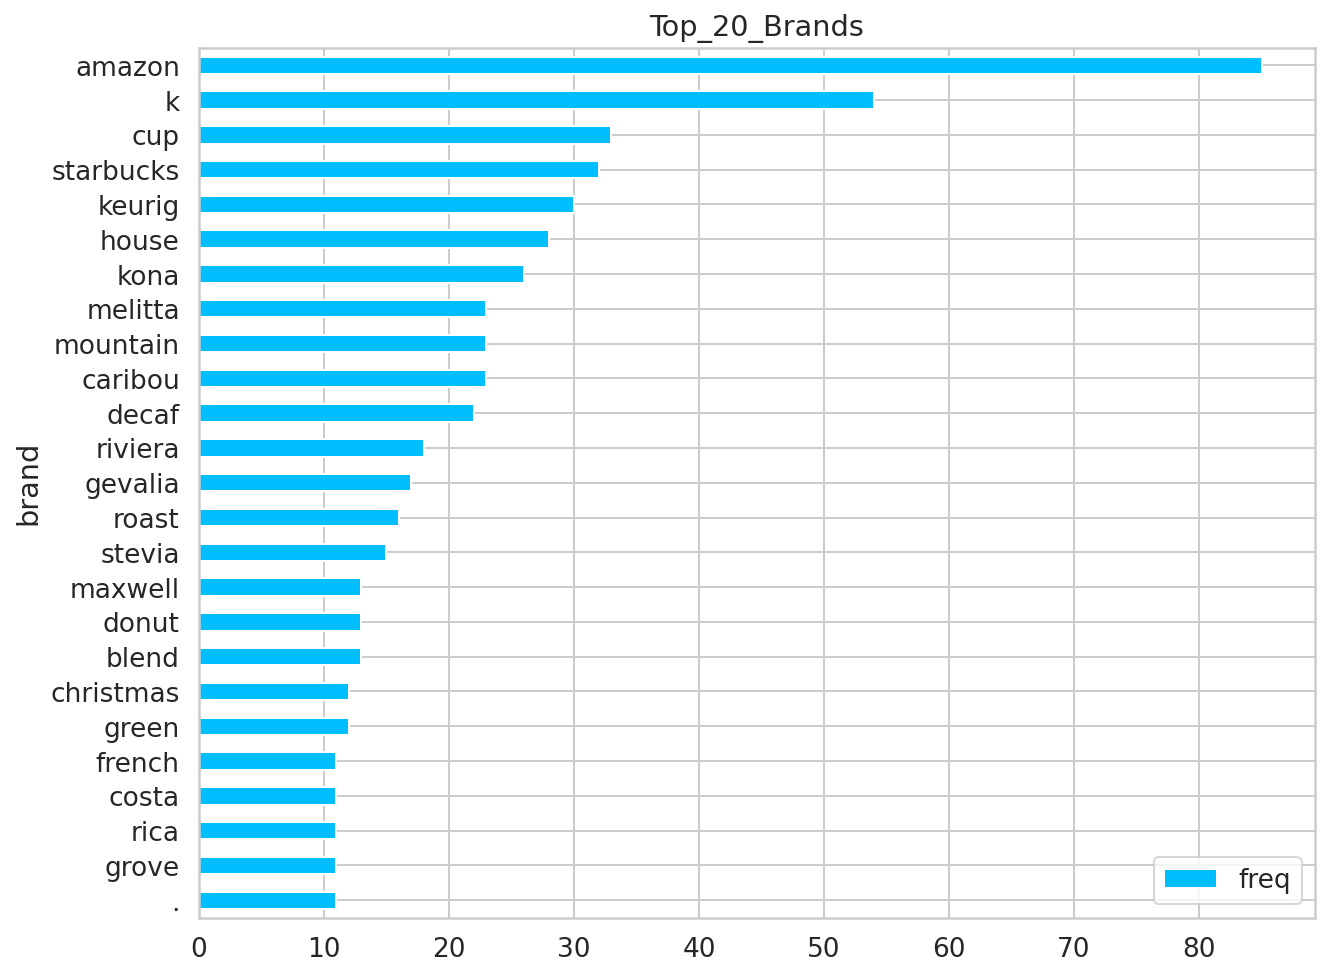

In [99]:
brand_20=brand_table[brand_table['freq'] >=frq].sort_values(by='freq',ascending=True)

rcParams['figure.figsize'] = 10,8
brand_20.plot(kind='barh',x='brand',y='freq',title='Top_20_Brands')
plt.show(block=True)